unzip the shape file

In [1]:
zip_address='../data/landing/SA2_2021_AUST_SHP_GDA2020.zip'
target_address='../data/landing/shape_info'

import zipfile
with zipfile.ZipFile(zip_address,"r") as zip_ref:
    zip_ref.extractall(target_address)

Read the shapefile

In [2]:
import geopandas as gpd

gdf_shapefile = gpd.read_file("../data/landing/shape_info")

read the income dataset and population dataset

In [3]:
from pyspark.sql import SparkSession

spark = (
    SparkSession.builder.appName("project2 preprocessing")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.driver.memory", "4g")
    .config("spark.executor.memory", "8g")
    .getOrCreate()
)

income_address=f"../data/raw/income_only.csv"
population_address='../data/raw/population.csv'

df_income=spark.read.csv(income_address, header=True)
df_population=spark.read.csv(population_address, header=True)

your 131072x1 screen size is bogus. expect trouble
24/10/18 09:26:55 WARN Utils: Your hostname, Honor resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
24/10/18 09:26:55 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/18 09:26:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/10/18 09:26:56 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


merge and process the datasets for visualization

In [4]:
# rename the columns to fit the column names in shape file

df_income = df_income.withColumnRenamed('SA2 code', 'SA2_CODE21')
df_population = df_population.withColumnRenamed('SA2 code', 'SA2_CODE21')

# convert to pandas dataset for merging

df_income_pandas = df_income.toPandas()
df_population_pandas = df_population.toPandas()

# merge dataset

income_gdf = df_income_pandas.merge(gdf_shapefile, on='SA2_CODE21')
population_gdf = df_population_pandas.merge(gdf_shapefile, on='SA2_CODE21')

# convert the dataset to geopandas dataset

income_gdf = gpd.GeoDataFrame(income_gdf, geometry='geometry')
population_gdf = gpd.GeoDataFrame(population_gdf, geometry='geometry')

draw and save the plots

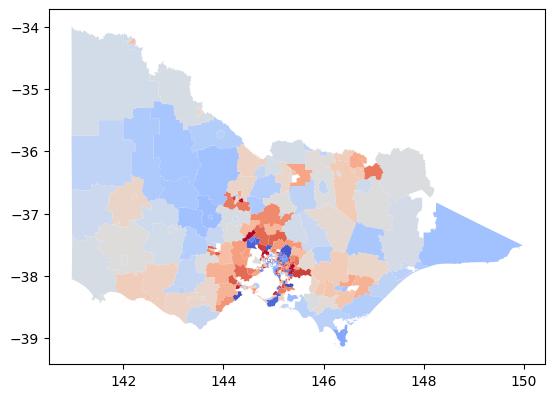

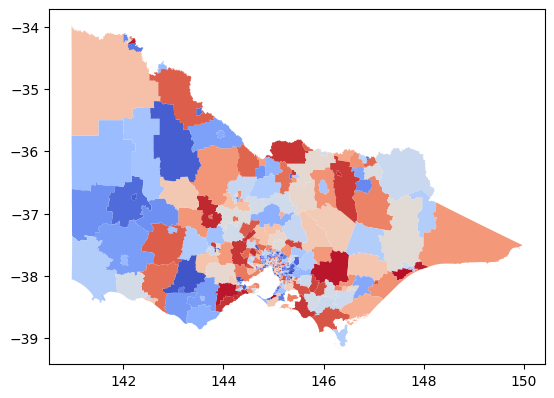

In [5]:
import matplotlib.pyplot as plt


ax=income_gdf.plot(column='equivalised_total_household_income_census_median_weekly', cmap='coolwarm')

plt.savefig("../plots/income_heatmap.png", dpi=300)

ax=population_gdf.plot(column='Net population change', cmap='coolwarm')

plt.savefig("../plots/population_heatmap.png", dpi=300)
